In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/content/drive/My Drive')

In [ ]:
import os
# 查看當前工作目錄
retval = os.getcwd()
print("當前工作目錄為 %s" % retval)

當前工作目錄為 /content/drive/My Drive


In [ ]:
!pip3 install piexif
!git clone https://nol.cs.nctu.edu.tw:234/open-source/TrackNetv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'TrackNetv2' already exists and is not an empty directory.


In [ ]:
#從Google Drive下載資料
! cp "/content/drive/MyDrive/part2.zip" /content/

In [ ]:
#資料解壓縮
! unzip -u /content/part2.zip -d /content/drive/MyDrive/

Archive:  /content/part2.zip
   creating: /content/drive/MyDrive/part2/
   creating: /content/drive/MyDrive/part2/test/
   creating: /content/drive/MyDrive/part2/test/00170/
  inflating: /content/drive/MyDrive/part2/test/00170/00170.mp4  
   creating: /content/drive/MyDrive/part2/test/00171/
  inflating: /content/drive/MyDrive/part2/test/00171/00171.mp4  
   creating: /content/drive/MyDrive/part2/test/00172/
  inflating: /content/drive/MyDrive/part2/test/00172/00172.mp4  
   creating: /content/drive/MyDrive/part2/test/00173/
  inflating: /content/drive/MyDrive/part2/test/00173/00173.mp4  
   creating: /content/drive/MyDrive/part2/test/00174/
  inflating: /content/drive/MyDrive/part2/test/00174/00174.mp4  
   creating: /content/drive/MyDrive/part2/test/00175/
  inflating: /content/drive/MyDrive/part2/test/00175/00175.mp4  
   creating: /content/drive/MyDrive/part2/test/00176/
  inflating: /content/drive/MyDrive/part2/test/00176/00176.mp4  
   creating: /content/drive/MyDrive/part2/test/

In [ ]:
!python3 predict.py --load_weights='/content/drive/MyDrive/TrackNetv2/3_in_1_out/model_33'

串流輸出內容已截斷至最後 5000 行。
1/1 [==============================] - 0s 26ms/step
Done......
1/1 [==============================] - 0s 23ms/step
Done......
1/1 [==============================] - 0s 21ms/step
Done......
1/1 [==============================] - 0s 21ms/step
Done......
1/1 [==============================] - 0s 23ms/step
Done......
1/1 [==============================] - 0s 26ms/step
Done......
1/1 [==============================] - 0s 22ms/step
Done......
1/1 [==============================] - 0s 21ms/step
Done......
1/1 [==============================] - 0s 22ms/step
Done......
1/1 [==============================] - 0s 27ms/step
Done......
1/1 [==============================] - 0s 29ms/step
Done......
1/1 [==============================] - 0s 25ms/step
Done......
1/1 [==============================] - 0s 21ms/step
Done......
1/1 [==============================] - 0s 22ms/step
Done......


場地預測

In [ ]:
os.chdir('/content/drive/MyDrive/TrackNetv2/3_in_1_out')

In [ ]:
! python3 Frame_Generator.py

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pprint
from google.colab.patches import cv2_imshow
import pprint
import csv
import json
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
s

(636.9059011164275, 476.94736842105266)

NameError: ignored

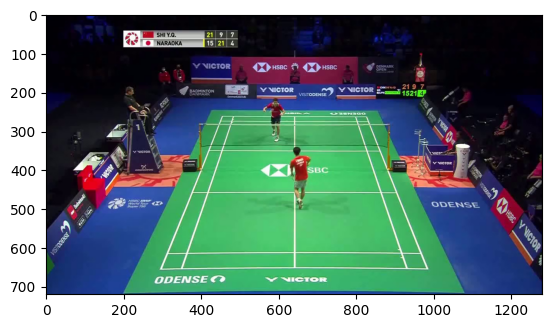

In [ ]:
filename = "/content/drive/MyDrive/Track_img/train/00286/0.jpg"
img = cv2.imread(filename)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
pts = np.array([[p1,p2,p3,p4]]).astype('int32')
x = [pts[0][0][0],pts[0][2][0]]
y = [pts[0][0][1],pts[0][2][1]]
plt.plot(s[0],s[1],marker='o', color="red")
plt.show()

In [ ]:
filename = "/content/drive/MyDrive/Track_img/train/00262/0.jpg"
img = cv2.imread(filename)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table) # apply gamma correction using the lookup table
green = np.uint8([[[0,255,0]]])
range1 = [20,255,200]
range2 = [20,0,0]
hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)

# detect green region
iterations = 2
mask = cv2.inRange(hsv, hsv_green-range1, hsv_green+range2) > 0
print(mask.shape)
mask = cv2.erode(mask.astype(np.float32), None, iterations = 1)
mask = cv2.dilate(mask.astype(np.float32), None, iterations = iterations)
mask = cv2.erode(mask, None, iterations = iterations+2)
mask = mask > 0
mask = np.stack((mask,mask,mask), 2)

(720, 1280)


In [ ]:
# line detect
kernel_size = 5

# sharpen
gray = adjust_gamma(gray, 0.4)
blur = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0).astype(int)
sub = gray.astype(int) - blur
sharped_img = np.clip(gray.astype(int) + sub*2, a_min = 0, a_max = 255).astype('uint8')

# sharped_gray = cv2.cvtColor(sharped_img, cv2.COLOR_BGR2GRAY)
low_threshold = 85
high_threshold = 85*3
edges = cv2.Canny(sharped_img, low_threshold, high_threshold, apertureSize=3)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 30  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 75  # minimum number of pixels making up a line
max_line_gap = 5  # maximum gap in pixels between connectable line segments

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

In [ ]:
import random

m_lines = []
def interpolate(pt):
    x1,y1,x2,y2 = pt
    num = max(abs(x1-x2), abs(y1-y2))
    np.around(np.linspace(x1, x2+1, num=num+1))
    return np.stack((np.around(np.linspace(x1, x2, num=num+1)), np.around(np.linspace(y1, y2, num=num+1))), axis=1).astype(int)

# filter out lines
for line in lines.reshape(-1,4):
    # interpolate
    full_line = interpolate(line)
    check = mask[:, :,0][full_line[:,1], full_line[:,0]]
    if check.sum() >= len(check) * 0.5:
        m_lines.append(line)

print(len(m_lines), 'Lines')

27 Lines


In [ ]:
import numpy as np
import cv2
from operator import sub
from math import atan, pi

def check_white(hsv, lines, set_i):
#     print('Set')
#     print(set_i)

    line_mask = np.zeros(hsv.shape[:2], 'uint8')
    for line_id in set_i:
        x1,y1,x2,y2 = lines[line_id]
        cv2.line(line_mask,(x1,y1),(x2,y2),(255,255,255),1)
    line_mask = cv2.dilate(line_mask.astype(np.float32), None, iterations=2) > 0
#     cv2.imshow('line_mask', line_mask.astype('uint8')*255)
#     cv2.waitKey(0)

    white_hsv = np.uint8([[[0,0,255]]])
    range1 = [20,255,200]
    range2 = [20,0,0]
    white_region = cv2.inRange(hsv, white_hsv-[0,0,60], white_hsv+[255,60,0]) > 0
#     cv2.imshow('white_region', white_region.astype('uint8')*255)
#     cv2.waitKey(0)
    white_line_region = np.logical_and(line_mask, white_region)
#     cv2.imshow('white_line_region', white_line_region.astype('uint8')*255)
#     cv2.waitKey(0)

    cv2.destroyAllWindows()
#     print((white_line_region.sum() / line_mask.sum()))
    return (white_line_region.sum() / line_mask.sum()) > 0.03

def find_edge(p1, p2, h, w):
    v12 = p2-p1 + 1e-18
    target = np.array([0 if v12[0] < 0 else w-1, 0 if v12[1] < 0 else h-1])
    steps = (target - p2)/v12
    edge_p2 = (steps.min()*v12+p2).astype(int)

    v21 = -v12
    target = np.array([0 if v21[0] < 0 else w-1, 0 if v21[1] < 0 else h-1])
    steps = (target - p1)/v21
    edge_p1 = (steps.min()*v21+p1).astype(int)
    if edge_p1[1] == 0: # start with top edge
        return edge_p1.astype(int), edge_p2.astype(int)
    elif edge_p1[0] == 0: # start with left edge
        if edge_p2[1] == 0: # end with top edge
            return edge_p2.astype(int), edge_p1.astype(int)
        else:
            return edge_p1.astype(int), edge_p2.astype(int)
    elif edge_p1[1] == h-1: # start with botton edge
        if edge_p2[0] == w-1: # end with right edge
            return edge_p1.astype(int), edge_p2.astype(int)
        else:
            return edge_p2.astype(int), edge_p1.astype(int)
    elif edge_p1[0] == w-1: # start with right edge
        return edge_p2.astype(int), edge_p1.astype(int)

def find_intersection(l1, l2):
    with np.errstate(divide='ignore', invalid='ignore'):
        # s * (x - px) + py = y
        s1 = (l1[3] - l1[1]) / (l1[2] - l1[0])
        s2 = (l2[3] - l2[1]) / (l2[2] - l2[0])
        s1 = 1e+20 if np.isinf(s1) else s1
        s2 = 1e+20 if np.isinf(s2) else s2
        px1 = l1[0]
        py1 = l1[1]
        px2 = l2[0]
        py2 = l2[1]
        # [s1 * (x - px1) + py1] - [s2 * (x - px2) + py2] = 0
        x = (-py1+py2 + s1*px1 - s2*px2) / (s1-s2)
        x = 1e+6 if np.isnan(x) else x
        y = s1 * (x - px1) + py1 if (x - px1) != 0 else s2 * (x - px2) + py2
        return (x,y)

def merge_lines(lines):
    num_l = len(lines)
#     remove = []
    for l1 in range(num_l):
        for l2 in range(l1+1, num_l):
            if (lines[l1] == lines[l2]).all() or (lines[l1] == np.roll(lines[l2], 2)).all():
#                 print(lines[l1], lines[l2])
#                 print(lines[l1], np.roll(lines[l2], 2))
                lines[l2] = np.array([0,0,0,0])
    lines = [i for i in lines if not (i==np.array([0,0,0,0])).all()]
    return lines

def dist(samples):
    xx,xy = np.meshgrid(samples[:,0], samples[:,0])
    yx,yy = np.meshgrid(samples[:,1], samples[:,1])
    ans = np.sqrt((xy-xx)**2+(yx-yy)**2)
    xx,xy = np.meshgrid(samples[:,2], samples[:,2])
    yx,yy = np.meshgrid(samples[:,3], samples[:,3])
    ans = np.maximum(ans, np.sqrt((xy-xx)**2+(yx-yy)**2))

    ans = np.triu(ans)
    ans[ans==0] = ans.max()+1
    return ans

def lines_clustering(lines:list, threshold, distance=dist):
    def step(data, group):
        if len(group)==1:
            return
        differ_map = distance(np.array(data))
        min_idx = np.unravel_index(differ_map.argmin(), differ_map.shape)
        if differ_map[min_idx] > threshold:
            return
        data[min_idx[0]] = (data[min_idx[0]] + data[min_idx[1]]) /2
        group[min_idx[0]] = group[min_idx[0]].union(group[min_idx[1]])
        data.pop(min_idx[1])
        group.pop(min_idx[1])
        del differ_map
        step(data, group)

    lines0 = lines.copy()
#     print('data:', lines0)
    group0 = [set([i]) for i in range(len(lines0))]
#     print('init:', group0)

    step(lines0, group0)
#     print('ans:', group0)
    group1 = []
    for set_i in group0:
        slopes = []
        print(set_i)
        for idx, line_i in enumerate(set_i):
            (x1,y1,x2,y2) = lines[line_i]
            slopes.append([line_i, atan((y2-y1)/(x2-x1) if (x2-x1)!=0 else 1e+6)+pi/2])
#             slopes.sort(key=lambda i:i[1])

        ele = np.array(slopes)[:,1]
        mean = np.mean(ele, axis=0)
        sd   = np.std(ele, axis=0)
#         print('MEAN_STD', mean, sd)
        newset = [x for x in slopes if (x[1] >= mean - 2 * sd)]
        newset = [x for x in newset if (x[1] <= mean + 2 * sd)]
        if len(newset) > 1:
            print('slopes:',slopes)
            print('newset:',newset)
            newset = [x[0] for x in newset]
            group1.append(set(newset))
    print(group1)
    return group1

def filter_set(lines, sets, _h, _w):
    fake_lines_sets = []
    lines = np.array(lines)
    for seti in sets:
        lines_s_in_set = lines[list(seti),:2]
        lines_e_in_set = lines[list(seti),2:]
        s_min = lines_s_in_set.sum(1).argmin()
        s_max = lines_s_in_set.sum(1).argmax()
        e_min = lines_e_in_set.sum(1).argmin()
        e_max = lines_e_in_set.sum(1).argmax()
        p1 = lines_s_in_set[s_min]
        p2 = lines_s_in_set[s_max]
        p3 = lines_e_in_set[e_min]
        p4 = lines_e_in_set[e_max]
        inter = find_intersection(np.concatenate((p1, p3), axis=0), np.concatenate((p2, p4), axis=0))
        if inter[0] < 0 or inter[0] >= _w or inter[1] < 0 or inter[1] >= _h:
            if p1[1] == 0:
                if p1.sum() > p2.sum():
                    fake_lines_sets.append([np.concatenate((p1, p3), axis=0), np.concatenate((p2, p4), axis=0)])
                else:
                    fake_lines_sets.append([np.concatenate((p2, p4), axis=0), np.concatenate((p1, p3), axis=0)])
            else:
                if p1.sum() > p2.sum():
                    fake_lines_sets.append([np.concatenate((p2, p4), axis=0), np.concatenate((p1, p3), axis=0)])
                else:
                    fake_lines_sets.append([np.concatenate((p1, p3), axis=0), np.concatenate((p2, p4), axis=0)])
        else:
#             fake_lines_sets.append([np.concatenate((p1, p4), axis=0), np.concatenate((p2, p3), axis=0)])
            if p1[1] == 0:
                if p1.sum() > p2.sum():
                    fake_lines_sets.append([np.concatenate((p1, p4), axis=0), np.concatenate((p2, p3), axis=0)])
                else:
                    fake_lines_sets.append([np.concatenate((p2, p3), axis=0), np.concatenate((p1, p4), axis=0)])
            else:
                if p1.sum() > p2.sum():
                    fake_lines_sets.append([np.concatenate((p2, p3), axis=0), np.concatenate((p1, p4), axis=0)])
                else:
                    fake_lines_sets.append([np.concatenate((p1, p4), axis=0), np.concatenate((p2, p3), axis=0)])
    return fake_lines_sets

def parse_color(strcolor):
    strcolor = strcolor[4:-1].split(',')
    strcolor.reverse()
    return tuple(map(int,strcolor))

In [ ]:
#from utils import merge_lines, lines_clustering, find_edge, find_intersection, parse_color, filter_set, check_white
from math import sqrt
#import colorbrewer
folder=""
_h, _w, _ = img.shape
e_m_lines = []
for x1,y1,x2,y2 in m_lines:
    (e_x1,e_y1), (e_x2,e_y2) = find_edge(np.array([x1,y1]), np.array([x2,y2]), _h, _w)
    e_m_lines.append(np.array([e_x1,e_y1,e_x2,e_y2]))
e_m_lines.sort(key=lambda ele: ele[1])
idx_non_0 = next((index for index,value in enumerate(np.array(e_m_lines)[:,1].tolist()) if value != 0), None)
idx_is__h = next((index for index,value in enumerate(np.array(e_m_lines)[:,1].tolist()) if value == _h-1), None)
e_m_lines[:idx_non_0] = sorted(e_m_lines[:idx_non_0], key=lambda ele: -ele[0])
if idx_is__h != None:
    e_m_lines[idx_is__h:] = sorted(e_m_lines[idx_is__h:], key=lambda ele: ele[0])

e_m_lines = merge_lines(e_m_lines)
# only keep the set that has more than one line
line_set = [i for i in lines_clustering(e_m_lines, threshold=8) if len(i)>1 and check_white(hsv, e_m_lines, i)]
print(len(line_set))

tmp_2 = np.zeros_like(img) + mask.astype('uint8')*50

fake_sets = filter_set(e_m_lines, line_set, _h, _w)
tmp_2_f = np.zeros_like(img) + mask.astype('uint8')*50


{0, 1}
slopes: [[0, 2.702152026939185], [1, 2.701013545965825]]
newset: [[0, 2.702152026939185], [1, 2.701013545965825]]
{2, 3}
slopes: [[2, 3.141591653589793], [3, 3.141591653589793]]
newset: [[2, 3.141591653589793], [3, 3.141591653589793]]
{4, 5}
slopes: [[4, 0.28031911651320085], [5, 0.28288594128662736]]
newset: [[4, 0.28031911651320085], [5, 0.28288594128662736]]
{6}
{8, 9, 10, 7}
slopes: [[8, 1.5707963267948966], [9, 1.5707963267948966], [10, 1.5707963267948966], [7, 1.5707963267948966]]
newset: [[8, 1.5707963267948966], [9, 1.5707963267948966], [10, 1.5707963267948966], [7, 1.5707963267948966]]
{16, 17, 11, 12, 13, 15}
slopes: [[16, 1.5707963267948966], [17, 1.5707963267948966], [11, 1.5707963267948966], [12, 1.5707963267948966], [13, 1.5707963267948966], [15, 1.5707963267948966]]
newset: [[16, 1.5707963267948966], [17, 1.5707963267948966], [11, 1.5707963267948966], [12, 1.5707963267948966], [13, 1.5707963267948966], [15, 1.5707963267948966]]
{14}
{18, 19, 20}
slopes: [[18, 1.57

In [ ]:
stand = [sublist[0] for sublist in fake_sets]
pp.pprint(stand)
inter = np.zeros((len(stand),len(stand),2), 'int')
for i,l1 in enumerate(stand):
    for j,l2 in enumerate(stand):
        if i>=j: continue
        inter[i,j] = np.clip(np.array(find_intersection(l1,l2)), -2000000000, 2000000000)
np.set_printoptions(suppress=True)
# pp.pprint(inter[...,0])
# pp.pprint(inter[...,1])
intergroup = list()
intergroup.append({(0,1)})
for i in range(len(stand)):
    for j in range(len(stand)):
        if i>=j: continue
        new_group = True
        for si,seti in enumerate(intergroup):
            same_group = True
            for ele in seti:
                if np.linalg.norm(inter[i,j] - inter[ele]) > 100: #TODO Looserfor4avg rulebasefor5avgand6avg
                    same_group = False
                    break
            if same_group:
                intergroup[si].add((i,j))
                new_group = False
                break
        if new_group:
            intergroup.append({(i,j)})
intergroup.sort(key = lambda ele: -len(ele))
SET1 = set([ggg for gg in intergroup[0] for ggg in gg])
SET2 = set([ggg for gg in intergroup[1] for ggg in gg])
print('SET:', SET1)
print('SET:', SET2)

[   array([643,   0, 643, 719]),
    array([546,   0, 339, 719]),
    array([   0,  267, 1279,  267]),
    array([   0,  281, 1279,  281]),
    array([   0,  359, 1279,  359]),
    array([   0,  464, 1279,  464]),
    array([   0,  604, 1279,  604])]
SET: {2, 3, 4, 5, 6}
SET: {0, 2, 3, 4}


In [ ]:
import itertools
choose1 = list(itertools.combinations(SET1,len(SET1))) + list(itertools.combinations(SET1,len(SET1)))
choose2 = list(itertools.combinations(SET2,len(SET2))) + list(itertools.combinations(SET2,len(SET2)))
pp.pprint(choose2)

print(set([(i[0], i[-1]) for i in choose1]))
print(set([(i[0], i[-1]) for i in choose2]))
cand = 0
maxwin = 0
for l1,l2 in set([(i[0], i[-1]) for i in choose1]):
    for l3,l4 in set([(i[0], i[-1]) for i in choose2]):
        p1 = np.array(find_intersection(stand[l1],stand[l3]))
        p2 = np.array(find_intersection(stand[l2],stand[l3]))
        p3 = np.array(find_intersection(stand[l2],stand[l4]))
        p4 = np.array(find_intersection(stand[l1],stand[l4]))
        pts = np.array([[p1,p2,p3,p4]]).astype('int32')
        test = np.copy(tmp_2_f)
        color = (255,255,255)
        test = cv2.fillPoly(test, pts, color)

        cand += 1
        test = np.zeros((_h,_w), 'uint8')
        test = cv2.fillPoly(test, pts, (1, 1, 1)).astype(bool)
        if np.logical_and(mask[...,0], test).sum() > maxwin and np.logical_and(mask[...,0], test).sum()*100/test.sum() > 50:
            print('new winner:')
            maxwin = np.logical_and(mask[...,0], test).sum()
            best = ((l1,l2),(l3,l4))
        print('{} {} count {}/{}, {:.2f}, {}'.format((l1,l2),
                                                     (l3,l4),
                                                     np.logical_and(mask[...,0], test).sum(),
                                                     test.sum(),
                                                     np.logical_and(mask[...,0], test).sum()*100/test.sum(),
                                                     '' if np.logical_and(mask[...,0], test).sum()*100/test.sum() < 80 else 'good'))
#         cv2.imshow('test', test.astype('uint8')*255)
#         cv2.waitKey(0)
cv2.destroyAllWindows()

((l1,l2),(l3,l4)) = best
p1 = np.array(find_intersection(fake_sets[l1][0],fake_sets[l3][0]))
p2 = np.array(find_intersection(fake_sets[l2][1],fake_sets[l3][0]))
p3 = np.array(find_intersection(fake_sets[l2][1],fake_sets[l4][1]))
p4 = np.array(find_intersection(fake_sets[l1][0],fake_sets[l4][1]))
pts = np.array([[p1,p2,p3,p4]]).astype('int32')

[(0, 2, 3, 4), (0, 2, 3, 4)]
{(2, 6)}
{(0, 4)}
new winner:
(2, 6) (0, 4) count 56180/71236, 78.86, 


In [ ]:
data_path = '/content/drive/MyDrive/part2_test_hitter'

for file in os.listdir(data_path):
  filename = os.path.join(data_path,str(file))
  with open(filename, newline='') as csvFile:
    rows = csv.reader(csvFile)
    csvFile.seek(0)
    total = len(csvFile.readlines())
    csvFile.seek(0)
    with open('/content/drive/MyDrive/part2_test_image/'+file[:-11]+'_seven.csv','w', newline='') as csvfile:
      h = csv.writer(csvfile)
      h.writerow(['ShotSeq','HitFrame','Hitter','LandingX','LandingY','BallType','Winner'])
      for i,row in enumerate(rows):
        if i == 0:
          continue
        elif i == (total-1):
          h.writerow([i,row[0],row[1],row[3],row[4],row[2],row[1]])
        else:
           h.writerow([i,row[0],row[1],row[3],row[4],row[2],'X'])

擊球時間預測

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from scipy.optimize import curve_fit
import csv
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.signal import find_peaks
import argparse

In [ ]:
data_path = '/content/drive/MyDrive/part2_test'
for file in os.listdir(data_path):
  filename = os.path.join(data_path,str(file))

  list1=[]
  frames=[]
  realx=[]
  realy=[]
  points=[]

  def angle(v1, v2):
      dx1 = v1[2] - v1[0]
      dy1 = v1[3] - v1[1]
      dx2 = v2[2] - v2[0]
      dy2 = v2[3] - v2[1]
      angle1 = math.atan2(dy1, dx1)
      angle1 = int(angle1 * 180/math.pi)
      angle2 = math.atan2(dy2, dx2)
      angle2 = int(angle2 * 180/math.pi)
      if angle1*angle2 >= 0:
          included_angle = abs(angle1-angle2)
      else:
          included_angle = abs(angle1) + abs(angle2)
          if included_angle > 180:
              included_angle = 360 - included_angle
      return included_angle

  def get_point_line_distance(point, line):
      point_x = point[0]
      point_y = point[1]
      line_s_x = line[0]
      line_s_y = line[1]
      line_e_x = line[2]
      line_e_y = line[3]
      if line_e_x - line_s_x == 0:
          return math.fabs(point_x - line_s_x)
      if line_e_y - line_s_y == 0:
          return math.fabs(point_y - line_s_y)
      #斜率
      k = (line_e_y - line_s_y) / (line_e_x - line_s_x)
      #截距
      b = line_s_y - k * line_s_x
      #带入公式得到距离dis
      dis = math.fabs(k * point_x - point_y + b) / math.pow(k * k + 1, 0.5)
      return dis

  with open(filename, newline='') as csvFile:
      rows = csv.reader(csvFile, delimiter=',')
      num = 0
      count=0
      for row in rows:
          list1.append(row)
      front_zeros=np.zeros(len(list1))
      for i in range(1,len(list1)):
          frames.append(int(float(list1[i][0])))
          realx.append(int(float(list1[i][2])))
          realy.append(int(float(list1[i][3])))
          if int(float(list1[i][2])) != 0:
              front_zeros[num] = count
              points.append((int(float(list1[i][2])),int(float(list1[i][3])),int(float(list1[i][0]))))
              num += 1
          else:
              count += 1

  # 羽球2D軌跡點
  points = np.array(points)
  x, y, z = points.T

  Predict_hit_points = np.zeros(len(frames))
  ang = np.zeros(len(frames))
  # from scipy.signal import find_peaks
  peaks, properties = find_peaks(y, prominence=5)

  #print(peaks)

  if(len(peaks) >= 5):
      lower = np.argmin(y[peaks[0]:peaks[1]])
      if (y[peaks[0]] - lower) < 5:
          peaks = np.delete(peaks,0)

      lower = np.argmin(y[peaks[-2]:peaks[-1]])
      if (y[peaks[-1]] - lower) < 5:
          peaks = np.delete(peaks,-1)

  #print()
  #print('Serve : ')
  start_point = 0

  for i in range(len(y)-1):
      if((y[i] - y[i+1]) / (z[i+1] - z[i]) >= 5):
          start_point = i+front_zeros[i]
          Predict_hit_points[int(start_point)] = 1
          #print(int(start_point))
          break

  #print('End : ')
  end_point = 10000

  #print('Predict points : ')
  #plt.plot(z,y*-1,'-')
  for i in range(len(peaks)):
      #print(peaks[i]+int(front_zeros[peaks[i]]),end=',')
      if(peaks[i]+int(front_zeros[peaks[i]]) >= start_point and peaks[i]+int(front_zeros[peaks[i]]) <= end_point):
          Predict_hit_points[peaks[i]+int(front_zeros[peaks[i]])] = 1


  #打擊的特定frame = peaks[i]+int(front_zeros[peaks[i]])
  #print()
  #print('Extra points : ')
  for i in range(len(peaks)-1):
      start = peaks[i]
      end = peaks[i+1]+1
      upper=[]
      #plt.plot(z[start:end],y[start:end]*-1,'-')
      lower = np.argmin(y[start:end]) #找到最低谷(也就是從最高點開始下墜到下一個擊球點),以此判斷扣殺或平球軌跡
      for j in range(start+lower, end+1):
          if(j-(start+lower) > 5) and (end - j > 5):
              if (y[j] - y[j-1])*3 < (y[j+1] - y[j]):
                  #print(j, end=',')
                  ang[j+int(front_zeros[j])] = 4

              point = [x[j],y[j]]
              line=[x[j-1],y[j-1],x[j+1],y[j+1]]
              # if get_point_line_distance(point,line) > 2.5:
              if angle([x[j-1],y[j-1], x[j],y[j]],[x[j],y[j], x[j+1],y[j+1]]) > 130:
                  #print(j, end=',')
                  ang[j+int(front_zeros[j])] = 5

  ang1, _ = find_peaks(ang, distance=15)
  #final_predict, _  = find_peaks(Predict_hit_points, distance=10)
  for i in ang1:
      Predict_hit_points[i] = ang[i]
  Predict_hit_points,_ = find_peaks(Predict_hit_points, distance=5)
  final_predict = []
  for i in (Predict_hit_points):
      final_predict.append(i)

  #print()
  #print('Final predict : ')
  #print(list(final_predict))

  with open('/content/drive/MyDrive/part2_test_event/'+file[:-12] + '_event.csv','w', newline='') as csvfile1:
    h = csv.writer(csvfile1)
    h.writerow(['frame','event','LandingX','LandingY'])
    for i in range(len(frames)):
        if i in final_predict:
            if i in ang1:
              h.writerow([frames[i],int(ang[i]),realx[i],realy[i]])
            else:
              h.writerow([frames[i],1,realx[i],realy[i]])

姿態檢測

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]

if not exists(project_name):
  !rm -rf openpose
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  print("install new CMake because of CUDA10")
  cmake_version = 'cmake-3.20.2-linux-x86_64.tar.gz'
  if not exists(cmake_version):
    !wget -q 'https://cmake.org/files/v3.20/{cmake_version}'
  !tar xfz {cmake_version} --strip-components=1 -C /usr/local

  print("clone openpose")
  !git clone -q --depth 1 $git_repo_url
  print("install system dependencies")
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  print("build openpose")
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`

In [ ]:
# detect poses on the these 5 seconds
!./build/examples/openpose/openpose.bin --video /content/drive/MyDrive/part1/train/00001/00001.mp4 --write_json /content/drive/MyDrive/Track_img --display 0

/bin/bash: ./build/examples/openpose/openpose.bin: Permission denied


In [ ]:
import json
data_path = '/content/drive/MyDrive/part2_test_seven'
for file in os.listdir(data_path):
  filename = os.path.join(data_path,str(file))
  with open(filename, newline='') as csvFile:
    rows = csv.reader(csvFile)
    for i,row in enumerate(rows):
      if i ==0:
        continue
      else:
        with open('/content/drive/MyDrive/part2_test_value/'+file[:-10]+'_value.csv','w', newline='') as csvfile:
          h = csv.writer(csvfile)
          h.writerow(['VideoName','ShotSeq','HitFrame','Hitter',
                      'BallHeight','RoundHead','BackHand',
                      'LandingX','LandingY',
                      'HitterLocationX','HitterLocationY',
                      'DefenderLocationX','DefenderLocationY',
                      'BallType','Winner'])
          for i,row in enumerate(rows):
            max_zeros = 12
            image_num = '0' * max_zeros + row[1]
            image_num = image_num[-max_zeros:]
            if str(file[:-10]+'_'+image_num+'_keypoints.json') not in os.listdir('/content/drive/MyDrive/part2_test_pose/'+file[:-10]+'/'):
              continue
            with open('/content/drive/MyDrive/part2_test_pose/'+file[:-10]+'/'+file[:-10]+'_'+image_num+'_keypoints.json') as f:
              data = json.load(f)
              if i == 0:
                continue
              elif row[2]=='B':
                if data['people'][0]['hand_right_keypoints_2d'][0] > data['people'][0]['pose_keypoints_2d'][8*3]:
                  back = 2
                else:
                  back = 1
                if data['people'][0]['hand_right_keypoints_2d'][1] > data['people'][0]['pose_keypoints_2d'][17*3+1]:
                  height = 2
                else:
                  height = 1
                if data['people'][0]['pose_keypoints_2d'][17*3] < data['people'][0]['pose_keypoints_2d'][8*3]:
                  round = 1
                else:
                  round = 2
                if data['people'][0]['pose_keypoints_2d'][20*3+1] < data['people'][0]['pose_keypoints_2d'][23*3+1]:
                  hitterY = data['people'][0]['pose_keypoints_2d'][20*3+1]
                  hitterX = data['people'][0]['pose_keypoints_2d'][20*3]
                else:
                  hitterY = data['people'][0]['pose_keypoints_2d'][23*3+1]
                  hitterX = data['people'][0]['pose_keypoints_2d'][23*3]
                if data['people'][1]['pose_keypoints_2d'][20*3+1] > data['people'][1]['pose_keypoints_2d'][23*3+1]:
                  defenderY = data['people'][1]['pose_keypoints_2d'][20*3+1]
                  defenderX = data['people'][1]['pose_keypoints_2d'][20*3]
                else:
                  defenderY = data['people'][1]['pose_keypoints_2d'][23*3+1]
                  defenderX = data['people'][1]['pose_keypoints_2d'][23*3]

                h.writerow([file[:-10]+'.mp4',row[0],row[1],row[2],height,round,back,row[3],row[4],
                        hitterX,hitterY,defenderX,defenderY,
                        row[5],row[6]])
              else:
                if data['people'][0]['hand_right_keypoints_2d'][0] < data['people'][1]['pose_keypoints_2d'][8*3]:
                  back = 2
                else:
                  back = 1
                if data['people'][0]['hand_right_keypoints_2d'][1] > data['people'][1]['pose_keypoints_2d'][17*3+1]:
                  height = 2
                else:
                  height = 1
                if data['people'][1]['pose_keypoints_2d'][17*3] < data['people'][1]['pose_keypoints_2d'][8*3]:
                  round = 1
                else:
                  round = 2
                if data['people'][1]['pose_keypoints_2d'][20*3+1] > data['people'][1]['pose_keypoints_2d'][23*3+1]:
                  hitterY = data['people'][1]['pose_keypoints_2d'][20*3+1]
                  hitterX = data['people'][1]['pose_keypoints_2d'][20*3]
                else:
                  hitterY = data['people'][1]['pose_keypoints_2d'][23*3+1]
                  hitterX = data['people'][1]['pose_keypoints_2d'][23*3]
                if data['people'][0]['pose_keypoints_2d'][20*3+1] > data['people'][0]['pose_keypoints_2d'][23*3+1]:
                  defenderY = data['people'][0]['pose_keypoints_2d'][20*3+1]
                  defenderX = data['people'][0]['pose_keypoints_2d'][20*3]
                else:
                  defenderY = data['people'][0]['pose_keypoints_2d'][23*3+1]
                  defenderX = data['people'][0]['pose_keypoints_2d'][23*3]

                h.writerow([file[:-10]+'.mp4',row[0],row[1],row[2],height,round,back,row[3],row[4],
                            hitterX,hitterY,defenderX,defenderY,
                            row[5],row[6]])

In [ ]:
data_path = '/content/drive/MyDrive/part2_test_value'

for file in os.listdir(data_path):
  filename = os.path.join(data_path,str(file))
  if file.endswith('.csv'):
    with open(filename, newline='') as csvFile:
      rows = csv.reader(csvFile)
      csvFile.seek(0)
      total = len(csvFile.readlines())
      csvFile.seek(0)
      with open('/content/drive/MyDrive/part2_test_fif/'+file[:-10]+'_fif.csv','w', newline='') as csvfile:
        h = csv.writer(csvfile)
        h.writerow(['VideoName','ShotSeq','HitFrame','Hitter',
                        'BallHeight','RoundHead','BackHand',
                        'LandingX','LandingY',
                        'HitterLocationX','HitterLocationY',
                        'DefenderLocationX','DefenderLocationY',
                        'BallType','Winner'])
        for i,row in enumerate(rows):
            if i == 0:
              continue
            elif i == (total-1):
              h.writerow([row[0],i,row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10],row[11],row[12],row[13],row[3]])
            else:
              h.writerow([row[0],i,row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10],row[11],row[12],row[13],'X'])

In [ ]:
data_path = '/content/drive/MyDrive/part2_test_fif/'
with open('/content/drive/MyDrive/fin.csv','a+', newline='') as csvfile:
  h = csv.writer(csvfile)
  """
  h.writerow(['VideoName','ShotSeq','HitFrame','Hitter',
                        'BallHeight','RoundHead','BackHand',
                        'LandingX','LandingY',
                        'HitterLocationX','HitterLocationY',
                        'DefenderLocationX','DefenderLocationY',
                        'BallType','Winner'])
  """
  for file in os.listdir(data_path):
    filename = os.path.join(data_path,str(file))
    if file.endswith('.csv'):
        with open(filename, newline='') as csvFile:
          rows = csv.reader(csvFile)
          for i,row in enumerate(rows):
              if i == 0:
                continue
              else:
                h.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10],row[11],row[12],row[13],row[14]])

In [ ]:
filename = '/content/drive/MyDrive/part1_val_value/00002_value.csv'
with open(filename, newline='') as csvFile:
  rows = csv.reader(csvFile)
  csvFile.seek(0)
  total = len(csvFile.readlines())
  csvFile.seek(0)
  with open('/content/drive/MyDrive/part1_val_value/00002.csv','w', newline='') as csvfile:
      h = csv.writer(csvfile)
      h.writerow(['VideoName','ShotSeq','HitFrame','Hitter',
                      'BallHeight','RoundHead','BackHand',
                      'LandingX','LandingY',
                      'HitterLocationX','HitterLocationY',
                      'DefenderLocationX','DefenderLocationY',
                      'BallType','Winner'])
      for i,row in enumerate(rows):
        if i == 0:
          continue
        elif i == (total-1):
          h.writerow([row[0],i,row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10],row[11],row[12],row[13],row[3]])
        else:
          h.writerow([row[0],i,row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10],row[11],row[12],row[13],'X'])

In [ ]:
data_path = '/content/drive/MyDrive/part1_val_value'
for file in os.listdir(data_path):
  filename = os.path.join(data_path,str(file))
  with open(filename, newline='') as csvFile:
    rows = csv.reader(csvFile)
    csvFile.seek(0)
    total = len(csvFile.readlines())
    if total<=1:
      print(filename)

/content/drive/MyDrive/part1_val_value/00065_value.csv
/content/drive/MyDrive/part1_val_value/00036_value.csv
/content/drive/MyDrive/part1_val_value/00157_value.csv
/content/drive/MyDrive/part1_val_value/00136_value.csv
/content/drive/MyDrive/part1_val_value/00141_value.csv
/content/drive/MyDrive/part1_val_value/00143_value.csv
/content/drive/MyDrive/part1_val_value/00164_value.csv
/content/drive/MyDrive/part1_val_value/00004_value.csv
/content/drive/MyDrive/part1_val_value/00155_value.csv
/content/drive/MyDrive/part1_val_value/00169_value.csv
/content/drive/MyDrive/part1_val_value/00118_value.csv
/content/drive/MyDrive/part1_val_value/00092_value.csv
/content/drive/MyDrive/part1_val_value/00042_value.csv
/content/drive/MyDrive/part1_val_value/00020_value.csv
/content/drive/MyDrive/part1_val_value/00085_value.csv
/content/drive/MyDrive/part1_val_value/00003_value.csv
/content/drive/MyDrive/part1_val_value/00059_value.csv
/content/drive/MyDrive/part1_val_value/00119_value.csv
/content/d

IsADirectoryError: ignored

In [ ]:

with open('/content/drive/MyDrive/part1_val_seven/'+'00065_seven.csv', newline='') as csvFile:
          rows = csv.reader(csvFile)
          for i,row in enumerate(rows):
            if i ==0:
              continue
            else:
              with open('/content/drive/MyDrive/part1_val_value/'+'00065_value.csv','w', newline='') as csvfile:
                h = csv.writer(csvfile)
                h.writerow(['VideoName','ShotSeq','HitFrame','Hitter',
                            'BallHeight','RoundHead','BackHand',
                            'LandingX','LandingY',
                            'HitterLocationX','HitterLocationY',
                            'DefenderLocationX','DefenderLocationY',
                            'BallType','Winner'])
                for i,row in enumerate(rows):
                  max_zeros = 12
                  image_num = '0' * max_zeros + str(int(int(row[1])))
                  image_num = image_num[-max_zeros:]
                  print(image_num)
                  if str('00065'+'_'+image_num+'_keypoints.json') not in os.listdir('/content/drive/MyDrive/part1_val_pose/'+'00065'+'/'):
                    continue
                  with open('/content/drive/MyDrive/part1_val_pose/'+'00065'+'/'+'00065'+'_'+image_num+'_keypoints.json') as f:
                    print(image_num)
                    data = json.load(f)
                    if i == 0:
                      continue
                    elif row[2]=='B':
                      if data['people'][0]['hand_right_keypoints_2d'][0] > data['people'][0]['pose_keypoints_2d'][8*3]:
                        back = 2
                      else:
                        back = 1
                      if data['people'][0]['hand_right_keypoints_2d'][1] > data['people'][0]['pose_keypoints_2d'][17*3+1]:
                        height = 2
                      else:
                        height = 1
                      if data['people'][0]['pose_keypoints_2d'][17*3] < data['people'][0]['pose_keypoints_2d'][8*3]:
                        round = 1
                      else:
                        round = 2
                      if data['people'][0]['pose_keypoints_2d'][20*3+1] < data['people'][0]['pose_keypoints_2d'][23*3+1]:
                        hitterY = data['people'][0]['pose_keypoints_2d'][20*3+1]
                        hitterX = data['people'][0]['pose_keypoints_2d'][20*3]
                      else:
                        hitterY = data['people'][0]['pose_keypoints_2d'][23*3+1]
                        hitterX = data['people'][0]['pose_keypoints_2d'][23*3]
                      if data['people'][1]['pose_keypoints_2d'][20*3+1] > data['people'][1]['pose_keypoints_2d'][23*3+1]:
                        defenderY = data['people'][1]['pose_keypoints_2d'][20*3+1]
                        defenderX = data['people'][1]['pose_keypoints_2d'][20*3]
                      else:
                        defenderY = data['people'][1]['pose_keypoints_2d'][23*3+1]
                        defenderX = data['people'][1]['pose_keypoints_2d'][23*3]

                      h.writerow([file[:-10]+'.mp4',row[0],row[1],row[2],height,round,back,row[3],row[4],
                              hitterX,hitterY,defenderX,defenderY,
                              row[5],row[6]])
                    else:
                      if data['people'][0]['hand_right_keypoints_2d'][0] < data['people'][1]['pose_keypoints_2d'][8*3]:
                        back = 2
                      else:
                        back = 1
                      if data['people'][0]['hand_right_keypoints_2d'][1] > data['people'][1]['pose_keypoints_2d'][17*3+1]:
                        height = 2
                      else:
                        height = 1
                      if data['people'][1]['pose_keypoints_2d'][17*3] < data['people'][1]['pose_keypoints_2d'][8*3]:
                        round = 1
                      else:
                        round = 2
                      if data['people'][1]['pose_keypoints_2d'][20*3+1] > data['people'][1]['pose_keypoints_2d'][23*3+1]:
                        hitterY = data['people'][1]['pose_keypoints_2d'][20*3+1]
                        hitterX = data['people'][1]['pose_keypoints_2d'][20*3]
                      else:
                        hitterY = data['people'][1]['pose_keypoints_2d'][23*3+1]
                        hitterX = data['people'][1]['pose_keypoints_2d'][23*3]
                      if data['people'][0]['pose_keypoints_2d'][20*3+1] > data['people'][0]['pose_keypoints_2d'][23*3+1]:
                        defenderY = data['people'][0]['pose_keypoints_2d'][20*3+1]
                        defenderX = data['people'][0]['pose_keypoints_2d'][20*3]
                      else:
                        defenderY = data['people'][0]['pose_keypoints_2d'][23*3+1]
                        defenderX = data['people'][0]['pose_keypoints_2d'][23*3]

                      h.writerow([file[:-10]+'.mp4',row[0],row[1],row[2],height,round,back,row[3],row[4],
                                  hitterX,hitterY,defenderX,defenderY,
                                  row[5],row[6]])

000000000019
000000000025
000000000034
000000000067
000000000077
000000000086
000000000094
000000000100
000000000109
000000000119
000000000124
000000000133
000000000155
000000000160
000000000170
000000000175
000000000183
000000000215
000000000222
000000000245
000000000253
000000000266


In [ ]:
data_path = '/content/drive/MyDrive/part2_test_value'
for file in os.listdir(data_path):
  if file.endswith('.csv'):
    filename = os.path.join(data_path,str(file))
    with open(filename, newline='') as csvFile:
      total = len(csvFile.readlines())
      csvFile.seek(0)
      if total<=1:
        print(filename)

/content/drive/MyDrive/part2_test_value/00342_value.csv
/content/drive/MyDrive/part2_test_value/00335_value.csv
/content/drive/MyDrive/part2_test_value/00368_value.csv
/content/drive/MyDrive/part2_test_value/00363_value.csv
/content/drive/MyDrive/part2_test_value/00382_value.csv
/content/drive/MyDrive/part2_test_value/00372_value.csv
/content/drive/MyDrive/part2_test_value/00355_value.csv
/content/drive/MyDrive/part2_test_value/00349_value.csv
/content/drive/MyDrive/part2_test_value/00348_value.csv
/content/drive/MyDrive/part2_test_value/00313_value.csv
/content/drive/MyDrive/part2_test_value/00312_value.csv
/content/drive/MyDrive/part2_test_value/00303_value.csv
/content/drive/MyDrive/part2_test_value/00307_value.csv
/content/drive/MyDrive/part2_test_value/00332_value.csv
/content/drive/MyDrive/part2_test_value/00255_value.csv
/content/drive/MyDrive/part2_test_value/00283_value.csv
/content/drive/MyDrive/part2_test_value/00243_value.csv
/content/drive/MyDrive/part2_test_value/00260_va